# Lecture 10: Symmetric eigenvalue problem(algorithms) and SVD(applications)

## Syllabus
**Week 1:** Matrices, vectors, matrix/vector norms, scalar products & unitary matrices  
**Week 2:** TAs-week (Strassen, FFT, a bit of SVD)  
**Week 3:** Matrix ranks, singular value decomposition, linear systems, eigenvalues  
**Week 4:** Matrix decompositions: QR, LU, SVD + test + structured matrices start

## Recap of the previous lecture
- LU decomposition and Gaussian elimination, Cholesky factorization
- QR decomposition and Gram-Schmidt algorithm
- Schur decomposition and QR-algorithm (basic)

## Today lecture

Today we will talk about:

- Algorithms for the symmetric eigenvalue problems (QR-algorithm, Divide-and-Conquer, bisection)
- SVD and its applicationss


## Symmetric eigenvalue problem

If $A = A^*$, then $A$ is a **normal matrix**, thus

$$A = U \Lambda U^*.$$

By Householder transformations we can reduce the matrix $A$ to the **triadiagonal form** (in the general case, **upper Hessenberg form**)



## QR-algorithm: iterations

The iterations of the QR-algorithm have the following form:

$$A_k = Q_k R_k, \quad A_{k+1} = R_k Q_k.$$

If $A_0 = A$ is <font color='red'> tridiagonal symmetric matrix </font>, this form is preserved by the QR-algorithm.

Let us see..

array([ -8.40446626e-01,   2.43868297e-01,   4.66623693e-01,
        -1.17431594e-01,   3.68022785e-02,  -3.14867052e-02,
         1.65306821e-02,   3.27003099e-03,   4.11804912e-03,
         1.13682966e-03,  -1.19526350e-03,  -1.78829558e-04,
         6.19949148e-04,  -1.67145664e-05,  -5.63227762e-06,
         2.27561748e-07,  -2.06766328e-06,   1.63583258e-06,
         1.76760086e-07,  -4.69013862e-07])

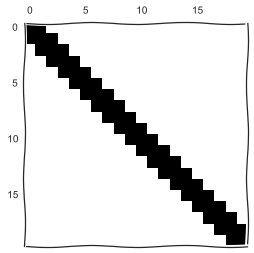

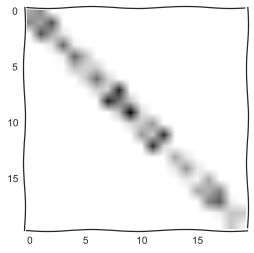

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
#Generate a random tridiagonal matrix

n = 20
d = np.random.randn(n)
sub_diag = np.random.randn(n-1)

mat = np.diag(d) + np.diag(sub_diag, -1) + np.diag(sub_diag, 1)
mat1 = np.abs(mat)
mat1 = mat1/np.max(mat1.flatten())
plt.spy(mat)
q, r = np.linalg.qr(mat)
plt.figure()
b = r.dot(q)
plt.imshow(np.abs(b))
#plt.figure()
#plt.imshow(np.abs(r.dot(q)))
q[0, :]

## Tridiagonal form
In the tridiagonal form, you do not have to compute the **Q** matrix: you only have to compute the **triadiagonal part**

In the "eigenvalues only" mode the computation takes $\mathcal{O}(n)$ for one step.

This is called **implicit QR-step**

## Theorem on implicit-QR iteration


All the implicit QR-algorithms are based on the following theorem: 

Let $$Q^* A Q = H$$ be a irreducible upper Hessenberg matrix.

Then, the first column of the matrix $Q$ defines all of its other columns. 


## Convergence of the QR-algorithm

The convergence of the QR-algorithm is a very **delicate issue** (see Tyrtyshnikov, Brief introduction to numerical analysis for details). 

Summary, if 

$$A = X \Lambda X^{-1},$$

and $$\Lambda = \begin{bmatrix} \Lambda_1 & 0 \\ 
0 & \Lambda_2 \end{bmatrix},$$

and there is a **gap** between the eigenvalues of $\Lambda_1$ and $\Lambda_2$, then the $21$ block in the QR-iteration goes to zero with $q = \frac{\lambda_m}{\lambda_{m+1}}$.
}
So we need to increase the gap!  The answer is given by the **shifted QR-algorithm**.

## QR-algorithm with shifts

$$A_{k} - s_k I = Q_k R_k, \quad A_{k+1} = R_k Q_k + s_k I$$

There are several ways to select the shifts.

We have **converged part** and not **converged part**: select $s_k = a_k$ (last non-converged diagonal element).

The **Wilkinson shift** is to select the eigenvalue of a $2 \times 2$ matrix. It is more robust, but there are examples of failure.

## Why we select such a shift?

To answer this question, we have to go back to the power method. 

Remember the power method for the computation of the eigenvalues.

$$x_{k+1} := A x_k.$$

It converges to the largest eigenvalue in modulus. 

The convergence can be arbitrary slow.

However, if we shift the matrix as 

$$ A := A - \lambda I,$$

the corresponding eigenvalue becomes small (but we need large).

## Inverse iteration and Rayleigh quotient iteration

To make a small eigenvalue large, we need to **invert the matrix**, and that gives us **inverse iteration**

$$x_{k+1} = (A - \lambda I)^{-1} x_k,$$

And the **Rayleigh quotient iteration** is given by the selection of the **adaptive shift**:

$$\lambda = \frac{(Ax_k, x_k)}{(x_k, x_k)}$$

In the symmetric case $A = A^*$ the convergence is **cubic**.

## Singular values and eigenvalues (1)

Now let us talk about singular values and eigenvalues. 

SVD: $$A = U \Lambda V^*$$

exists for any matrix.

It can be also viewed as a reduction of a given matrix to the diagonal form by means of 

two-sided unitary transformations:

$$\Lambda = U^* A V.$$

By Householder we can reduce to the **bidiagonal form**

## Singular values and eigenvalues (2)

Implicit QR-algorithm (with shifts) gives the way of computing the eigenvalues (and Schur form).

The problem of the computation of the SVD can be reduced to the **symmetric eigenvalue problem** in two ways:

0. Reduce to the bidiagonal form
1. Work with the tridiagonal matrix $$T = B^* B$$ 
2. Work with the extended matrix $$T = \begin{bmatrix} 0 & B \\ B^{\top} & 0 \end{bmatrix}$$


The case 1. is ok if you **do not form T directly**!

Thus, the problem of computing singular values can be reduced to the problem of the computation of the eigenvalues of symmetric tridiagonal matrix.

## Algorithms for the SEV 

1. QR-algorithm: the "gold standard" of the eigenvalue computations
2. RQI-iteration: Rayleigh quotient iteration is implicitly performed at each step of the QR-algorithm
3. Divide-and-conquer: the fastest (?) nowdays
4. Bisection method
5. Jacobi method

## Divide-and-conquer

Suppose we have a tridiagonal matrix, and we split it into two blocks:


$$T = \begin{bmatrix} T'_1 & B \\ B^{\top} & T'_2 \end{bmatrix}$$

We can write the matrix $T$ as

$$T = \begin{bmatrix} T_1 & 0 \\ 0 & T_2 \end{bmatrix} + b_m v v^{\top}$$

Suppose we have decomposed $T_1$ and $T_2$ already:

$$T_1 = Q_1 \Lambda_1 Q^*_1, \quad T_2 = Q_2 \Lambda_2 Q^*_2$$

Then,

$$\begin{bmatrix} Q^*_1 & 0 \\ 0 & Q^*_2 \end{bmatrix} T\begin{bmatrix} Q^*_1 & 0 \\ 0 & Q^*_2 \end{bmatrix} = D + \rho u u^{*},$$

I.e. we have reduced the problem to the problem of the computation of the eigenvalues of 


<font color='red'> Diagonal plus low-rank matrix </font>



## Diagonal-plus-low-rank matrix

Is it easy to compute the eigenvalues of the matrix

$$D + \rho u u^* $$

The characteristic polynomial has the form

$$\det(D + \rho uu^* - \lambda I) = \det(D - \lambda I)\det(I + \rho (D - \lambda I)^{-1} uu^*) = 0.$$

Then (prove!!) 

$$\det(I + v u^*) = ?$$


$$\det(I + \rho (D - \lambda I)^{-1} uu^*) = 1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda} = 0$$

## Characteristic equation

$$1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda} = 0$$

How to find the roots?

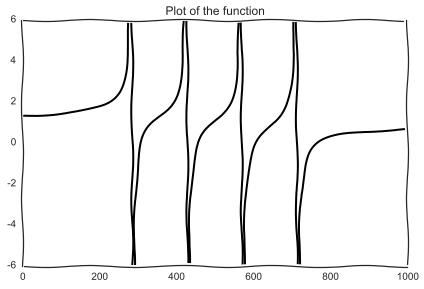

In [87]:
import numpy as np

lm = [1, 2, 3, 4]
M = len(lm)
D = np.array(lm)
a = np.min(lm)
b = np.max(lm)
t = np.linspace(-1, 6, 1000)
u = 0.5 * np.ones(M)
rho = 1
def fun(lam):
    return 1 + rho * np.sum(u**2/(D - lam))
res = [fun(lam) for lam in t]
plt.plot(res, 'k')
plt.ylim([-6, 6])
plt.tight_layout()
plt.title('Plot of the function')

## Conclusion

The function has only one root at $[d_i, d_{i+1}]$

We have proved, by the way, the **Cauchy interlacing theorem** (what happens to the eigenvalues under rank-$1$ perturbation)

## How to find the root

A Newton method will fail (draw a picture with a tangent line).

However, Newton method is just approximation of a function $f(\lambda)$ by a linear function.

Much better approximation is the **hyperbola**:

$$f(\lambda) \approx c_0 + \frac{c_1}{d_i - \lambda} + \frac{c_2}{d_{i+1} - \lambda}.$$

To fit the coefficients, we have to evaluate $f(\lambda)$ and $f'(\lambda)$ in the particular point.

After that, the approximation can be recovered from solving **quadratic equation**




## Important issues

First, stability: This method was abandoned for a long time due to instability of the computation of the eignenvectors.

The exact expression for the eigenvectors is  just

$$(D - \alpha_i I)^{-1}u,$$ where $\alpha_i$ is the computed root.

## Lowner theorem

The solution is by using a strange Lowner theorem:

If $\alpha_i$ and $d_i$ satisfy the **interlacing theorem** 


$$d_n < \alpha_n < \ldots < d_{i+1} < \alpha_{i+1} \ldots$$

Then there exists a vector $\widehat{u}$ such that $\alpha_i$ are exact eigenvalues of the matrix

$$\widehat{D} = D + \widehat{u} \widehat{u}^*.$$

So, you first compute the eigenvalues, then compute $\widehat{u}$ and only then the eigenvectors.

## Divide and conquer and the Fast Multipole Method

In the computations we have to evaluate the sums of the form

$$f(\lambda) = 1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{(d_i - \lambda)},$$

and have to do it at least for $n$ points. 

The complexity is then $\mathcal{O}(n^2)$, as for the QR-algorithm.

Can we make it $\mathcal{O}(n \log n)$? 

The answer is yes, but we have to replace the computations by the approximate ones

by the help of **Fast Multipole Method**.

I will do a short explanation on the whiteboard.

## Few more algorithms

Absolutely different approach is based on the **bisection**.

Given a matrix $A$ its inertia is defined as a triple $(\nu, \zeta, \pi)$,  

the number of negative, zero and positive eigenvalues. 

If $X$ is non-singular, then 

$$Inertia(A) = Inertia(X^* A X)$$

## Bisection via Gaussian elimination

Given $z$ we can do the Gaussian elimination:

$$A - zI = L D L^*,$$

and inertia of the diagonal matrix is trivial to compute.

Thus, if we want to find all the eigenvalues in the interval $a$, $b$

Using inertia, we can easily count the number of eigenvalues in an interval.

## Jacobi method

Recall what a Jacobi (Givens rotations) are:

In a plane they correspong to a $2 \times 2$ orthogonal matrix of the form

$$\begin{pmatrix} \cos \phi & \sin \phi \\ -\sin \phi & \cos \phi \end{pmatrix},$$

and in the $n$-dimensional case we select two variables $i$ and $j$ and rotate.

## Jacobi method (cont.)

The idea of the Jacobi method is to minimize

$$\mathrm{off}( U^* A U), $$

by applying succesive Jacobi rotations to "kill" off-diagonal elements. 

When the "pivot" is chosen, it is easy to eliminate it. 

The main question is then what is the order of **sweeps** we have to make (i.e. in which order to eliminate).

If we always eliminate the largest off-diagonal elements the method has quadratic convergence.

## Summary for this part
- Many algorithms for the computation of the SEV solution (QR, Divide-and-conquer, bisection, Jacobi)

## SVD

Now we go to the applications of the SVD.

SVD is extremely important in computational science and engineering.

It has many names: Principal component analysis, Proper Orthogonal Decomposition, Empirical Orthogonal Functions

We will consider:

1. Latent semantic analysis
2. Collaborative filtering
3. Data compression

## Application 1: Latent semantic analysis
One of the most famous application is Latent semantic indexing, see, for example,  
[Deerwester, Scott C., et al. "Indexing by latent semantic analysis." (1990)](http://www.cob.unt.edu/itds/faculty/evangelopoulos/dsci5910/LSA_Deerwester1990.pdf)  

The problem setup: we have a set of text documents $D_1, \ldots, D_N.$ We want to solve the search problem: i.e., we have a query as a set of words, and we want to find the best documents.  
Our data is processed as follows:  for each document we create a list of words contained in the document, and count the frequencies of each word. This is called the **bag of words** model (i.e., the document is unordered set of words).  

## Term-document matrix
This is how the term-document matrix $A$ is obtained. Its row size is **the size of the dictionary**.   
Its column size is **the number of documents**.  An element $A_{ij}$ the the frequency of occurence of the $i$-th word in the $j$-document.

To do the search, we can just multiply a term-documnt matrix by a **search vector**, i.e. a list of words.

**The problem**: The document will be returned only if there is an exact word match.  However, we might search for "Samuel Clemens", and hope to get the results for "Mark Twain" as well.  But there might be no exact match!  
How the SVD can help?

## Idea of LSI
Compute **low-rank approximation** $A_r$ of the term-document matrix $A$.  
$$A \approx A_r,$$
and **we do not care about the approximation error** (i.e., we do not require it to be small).  
The matrix $A_r$ can be then used to do queries.  

We project the documents to **low-dimensional subspace**, given a query $q$ the projection is  
$$q_r = \Sigma^{-1}_r U^{\top}_r q$$
Now we can compute the similarity between $d_r$ and other projected documents  
$$\widehat{d}_i = \Sigma^{-1}_r U^{\top}_r d_i,$$
and compute the **cosine** of the angles  between the query and the projected document.

## Demo
Now we can test a demo database

In [88]:
import numpy as np
import pandas as pd
import re #Regular expressions
rows = ['human', 'interface', 'computer', 'user', 'system', 'response', 'time', 'EPS', 'survey', 'trees', 'graph', 'minors']
nterms = len(rows)
docs = []
docs += ['Human machine interface for Lab ABC computer applications']
docs += ['A survey of user opinions of computer system response time']
docs += ['The EPS user interfaces management system']
docs += ['System and human system engineering testing of EPS']
docs += ['Relation of user-perceived response time on user management']
docs += ['The generation of random, binary, unordered trees']
docs += ['The intersection graph of paths in trees']
docs += ['Graph minors IV: Width of trees and well-quasi-ordering']
docs += ['Graph minors: A survey']
ndocs = len(docs)
term_doc = np.zeros((nterms, ndocs))
for i in xrange(nterms):
    for j in xrange(ndocs):
        if re.search(rows[i], docs[j], re.IGNORECASE):
            term_doc[i, j] = 1
#Use pandas to plot        
pd.DataFrame(data=term_doc,index=rows)

,0,1,2,3,4,5,6,7,8
human,1,0,0,1,0,0,0,0,0
interface,1,0,1,0,0,0,0,0,0
computer,1,1,0,0,0,0,0,0,0
user,0,1,1,0,1,0,0,0,0
system,0,1,1,1,0,0,0,0,0
response,0,1,0,0,1,0,0,0,0
time,0,1,0,0,1,0,0,0,0
EPS,0,0,1,1,0,0,0,0,0
survey,0,1,0,0,0,0,0,0,1
trees,0,0,0,0,0,1,1,1,0


Now we can compare the results between ordinary matvec and low-rank matvec.

In [89]:
query = 'Human computer interaction'
qv = np.zeros((nterms))
for i in xrange(nterms):
    if re.search(rows[i], query, re.IGNORECASE):
        qv[i] = 1
res1 = qv.dot(term_doc) #Non-compressed search result

u, s, v = np.linalg.svd(term_doc)
r = 2
u = u[:, :r]
s = s[:r]
v = v[:r, :] #Numpy transposes
appr1  = u.dot(np.diag(s)).dot(v)
res2 = qv.dot(appr1)
res_all = np.vstack((res1, res2)).T #To make two columns
print 'There query is:', query, ',the scores are:'
pd.DataFrame(res_all, index=docs, columns=['No SVD', 'SVD'])

There query is: Human computer interaction ,the scores are:


,No SVD,SVD
Human machine interface for Lab ABC computer applications,2,0.316794
A survey of user opinions of computer system response time,1,1.011276
The EPS user interfaces management system,0,0.663677
System and human system engineering testing of EPS,1,0.405542
Relation of user-perceived response time on user management,0,0.554066
"The generation of random, binary, unordered trees",0,-0.035325
The intersection graph of paths in trees,0,-0.065210
Graph minors IV: Width of trees and well-quasi-ordering,0,-0.082587
Graph minors: A survey,0,0.055939


## Application 2: Collaborative filtering

Another important (and similar) application comes from **recommender systems**.  

Suppose you have a **user-product matrix**: each user puts a rating for a particular product.

The matrix is then **the number of users times the number of products**. The goal is to recommend additional products to be bought for a particular user.  

The scheme is the same: we compute the SVD, and the recommendation for each user is just a column of the approximated matrix.

In [90]:
#Read the data
data_read = np.loadtxt('task2_transact_eval.txt',dtype=np.int32, skiprows=1,delimiter='|')

In [91]:
columns = ['SessionNo', 'ItemNo', 'TransType']
ds = pd.DataFrame(data=data_read,columns=columns)

In [92]:
from itertools import product
ds_buy = ds[ds.TransType==2][['SessionNo', 'ItemNo']]
users, inv_users = np.unique(data_read[:, 0], return_inverse=True)
products, inv_products = np.unique(data_read[:, 1], return_inverse=True)
print 'Unique sessions:', len(users), 'Unique products', len(products)
#Scipy spars

Unique sessions: 101217 Unique products 15182


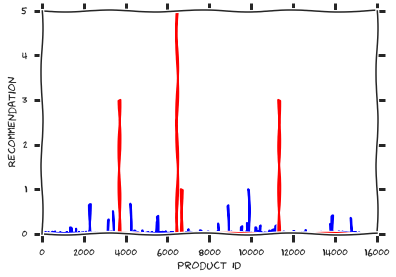

In [94]:
import scipy.sparse
import scipy.sparse.linalg
plt.xkcd()
nnz = len(inv_users)
spmat = scipy.sparse.coo_matrix((np.ones(nnz), (inv_users, inv_products)))
r =  2#Approximation rank
u, s, v = scipy.sparse.linalg.svds(spmat, r)
n = spmat.shape[0]
m = spmat.shape[1]
q = np.zeros(n)
user_id = 1
q[user_id] = 1.0

qrec = q.T.dot(u).dot(np.diag(s)).dot(v)
qrec = qrec / np.max(abs(qrec))
plt.plot(qrec)
qb = spmat.T.dot(q)
plt.plot(qb)
plt.xlabel('Product ID')
plt.ylabel('Recommendation')

## Application 3: Dense matrix compression

Dense matrices typically require $N^2$ elements to be stored. For $N \sim 10^4 - 10^5$ the memory requirements. A low rank approximation can reduces this number of $\mathcal{O}(Nr)$

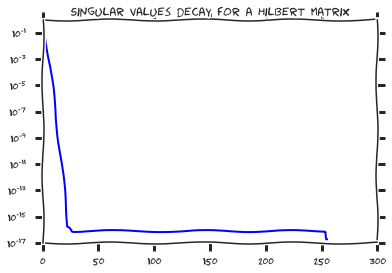

In [95]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()
n = 256
a = [[1.0/(i + j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.title('Singular values decay for a Hilbert matrix')

## A more realistic example
We can try to test on a more realistic matrix, since solving linear systems with Hilbert matrix has little practical sense. Instead, we solve a linear system with a matrix
$$A_{ij} = \frac{1}{i - j + \frac{1}{2}},$$
which corresponds to an integral equation
$$
    \int \frac{q(y)dy}{x - y } = f(x).
$$
In real life, the equation  
$$
    \int_{\Omega} \frac{q(y)dy}{\Vert x - y\Vert } = f(x),
$$
is solved, where $\Omega$ is a surface in 3D. This is used, for example, in modelling integral circuits.
Let us see what happens with the singular values.

4.8849813083506888e-15

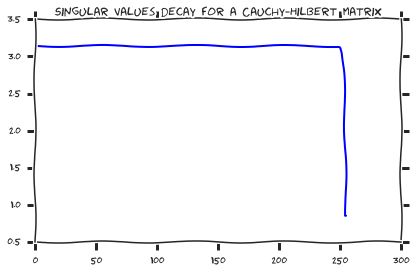

In [99]:
import numpy as np
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()
n = 256
a = [[1.0/(i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.plot(s)
plt.title('Singular values decay for a Cauchy-Hilbert matrix')
plt.tight_layout()
s[5] - np.pi

What to do?  

The idea is to break the matrix intro blocks  

$$
    A = \begin{bmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22}
    \end{bmatrix}
$$

and the blocks $A_{12}$ and $A_{21}$ will be of low-rank!  Let us try that..

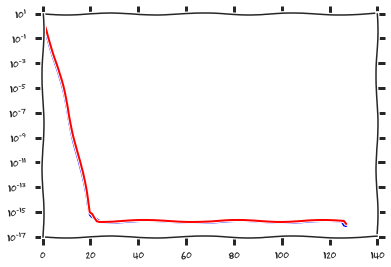

In [100]:
import numpy as np
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()
n = 256
a = [[1.0/(i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)

a12 = a[:n/2,n/2:]
a21 = a[n/2:,:n/2]
s12 = np.linalg.svd(a12)[1]
s21 = np.linalg.svd(a21)[1]
plt.semilogy(s12)
plt.semilogy(s21)#Actually, they are the same

## Block-low rank matrices

Surprisingly many matrices in PDEs can be well approximated by block-low-rank (other names: hierarchical, mosaic-skeleton) matrices.

They have linear storage, but algorithms are not very **simple**

## Summary of todays lecture

- Algorithms for symmetric eigenvalue problems
- Three applications of the SVD


## Next lecture
- Yes, test
- We start **sparse and/or structured** NLA.

# Questions?

In [81]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()